In [3]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import librosa.display
import librosa

from glob import glob

import ffmpeg

import os

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier

from scipy import interp

from itertools import cycle

import seaborn as sns

In [4]:
data1 = pd.read_csv('./Sonidos de casa/data_momento_aux.csv')
data2 = pd.read_csv('./Sonidos de casa/data_momento_aux_shaver.csv')
data3 = pd.read_csv('./Sonidos de casa/data_momento_aux_hairdryer.csv')
data4 = pd.read_csv('./Sonidos de casa/data_momento_aux_airconditioner.csv')
data5 = pd.read_csv('./Sonidos de casa/data_momento_aux_cellphone.csv')
data6 = pd.read_csv('./Sonidos de casa/data_momento_aux_comp_type.csv')
data7 = pd.read_csv('./Sonidos de casa/data_momento_aux_shower.csv')
data8 = pd.read_csv('./Sonidos de casa/data_momento_aux_vacuum_silence_dryer.csv')
data9 = pd.read_csv('./Sonidos de casa/data_momento_aux_blender_doorbell.csv')
data10 = pd.read_csv('./Sonidos de casa/data_momento_aux_alarm_faucet_microwave.csv')

data = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10])

# PCA - 5

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
features = ['mfcc', 'scem', 'scom', 'srom', 'sbwm', 'tempo', 'rmse']

x = data.loc[:, features].values
y = data.loc[:,['momento_aux']].values

x = StandardScaler().fit_transform(x)

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1',
                                      'principal component 2',
                                      'principal component 3',
                                      'principal component 4',
                                      'principal component 5'])

In [9]:
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,-2.908475,-1.183207,0.004665,-0.692620,-0.159871
1,0.597411,-1.375698,0.282320,-0.717515,0.182912
2,0.580970,3.266432,-0.161297,0.105091,0.430711
3,-0.744115,-1.413075,0.030856,-0.458438,-0.523544
4,-2.020234,-1.225178,-0.258659,0.596813,-0.563518


In [10]:
data[['momento_aux']].head()

,momento_aux
0,Lavadora
1,Aspiradora
2,Ducha
3,Lavadora
4,Lavadora


In [11]:
principalDf.reset_index(drop=True, inplace=True)

In [12]:
aux = data[['momento_aux']]
aux.reset_index(drop=True, inplace=True)

In [13]:
finalDf = pd.concat([principalDf, aux], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,momento_aux
0,-2.908475,-1.183207,0.004665,-0.692620,-0.159871,Lavadora
1,0.597411,-1.375698,0.282320,-0.717515,0.182912,Aspiradora
2,0.580970,3.266432,-0.161297,0.105091,0.430711,Ducha
3,-0.744115,-1.413075,0.030856,-0.458438,-0.523544,Lavadora
4,-2.020234,-1.225178,-0.258659,0.596813,-0.563518,Lavadora


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_xlabel('Principal Component 3', fontsize = 15)
ax.set_xlabel('Principal Component 4', fontsize = 15)
ax.set_xlabel('Principal Component 5', fontsize = 15)

ax.set_title('5 component PCA', fontsize = 20)
targets = ['Cena', 'Ducha', 'Lavadora', 'Aspiradora', 'Afeitadora', 'Secador_pelo', 
           'Aire_acondicionado', 'Telefono', 'Tecleo', 'Silencio', 'Secadora', 'Timbre', 
           'Licuadora', 'Alarma', 'Grifo', 'Microondas']
colors = ['r', 'g', 'b', 'y', 'k', 'gray', 'bisque', 'navy', 'olive', 'plum', 'teal', 'pink', 'wheat', 
          'maroon', 'skyblue', 'crimson']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['momento_aux'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], 
               finalDf.loc[indicesToKeep, 'principal component 2'], 
               finalDf.loc[indicesToKeep, 'principal component 3'], 
               finalDf.loc[indicesToKeep, 'principal component 4'], 
               finalDf.loc[indicesToKeep, 'principal component 5'], 
               c = color, 
               s = 50)
ax.legend(targets)
ax.grid()

In [14]:
pca.explained_variance_ratio_

array([0.48546933, 0.20640729, 0.13593341, 0.09685188, 0.04908501])

In [15]:
np.sum(pca.explained_variance_ratio_)*100

97.37469184281787

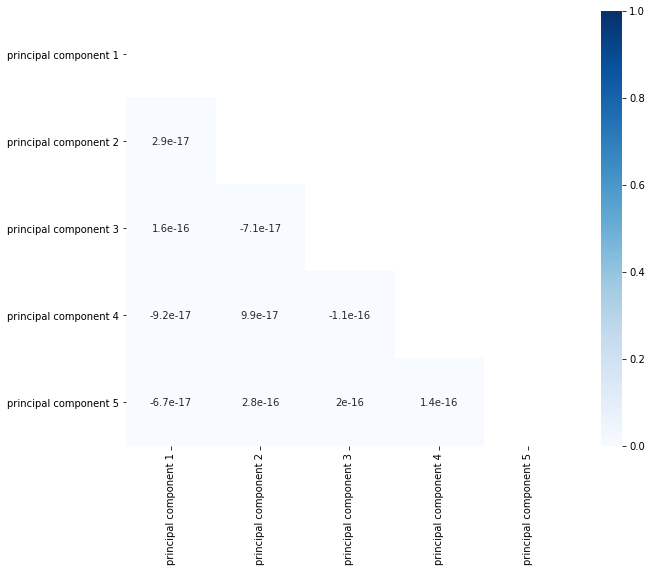

In [16]:
mask = np.zeros_like(finalDf.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(finalDf.corr(), mask=mask, annot=True, cmap="Blues")

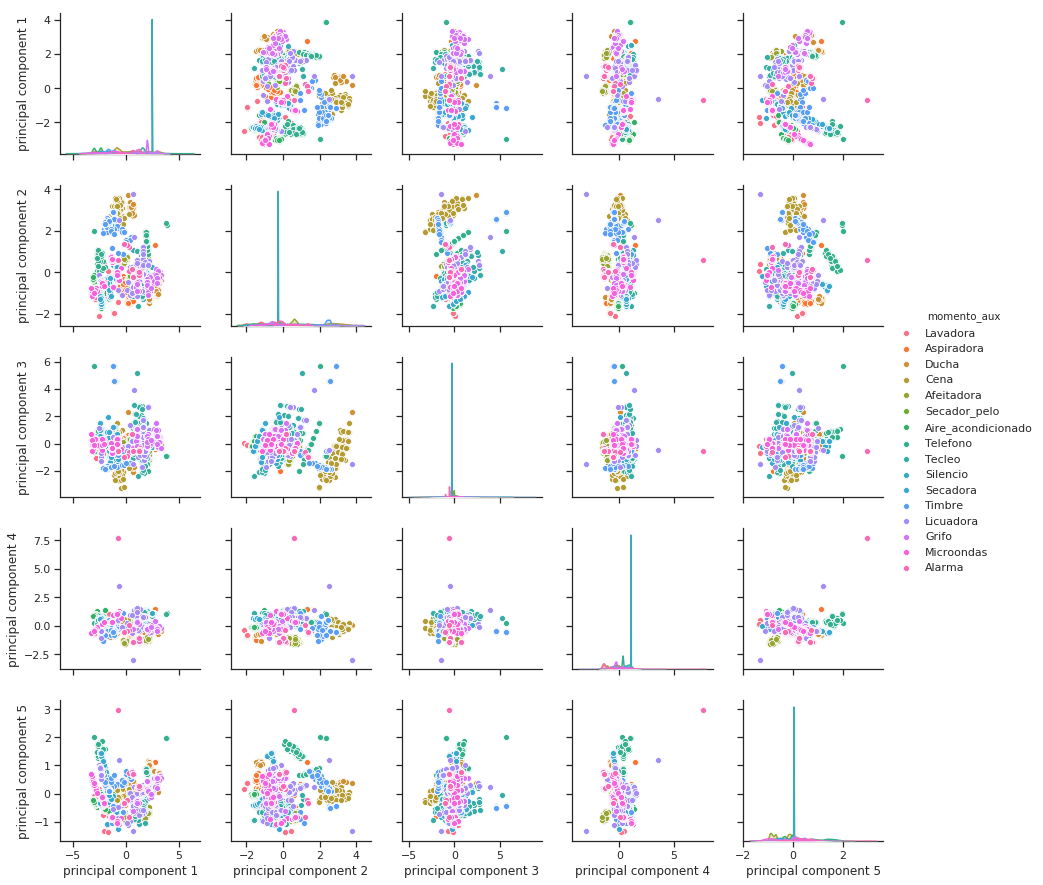

In [17]:
sns.set(style="ticks")

sns.pairplot(finalDf, hue="momento_aux")

In [18]:
y = pd.get_dummies(data=finalDf.momento_aux)
X = data.loc[:, finalDf.columns != 'momento_aux']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [19]:
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=60))
scores = cross_val_score(clf, X, y, cv=20)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.97986577 0.92567568 0.9527027  0.97297297 1.         0.93243243
 0.98648649 0.16891892 0.95945946 0.94594595 0.99324324 0.95945946
 0.97972973 0.91891892 0.85135135 0.92567568 0.96621622 1.
 0.97297297 0.93918919]
Accuracy: 0.92 (+/- 0.35)


In [20]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9612141652613828

In [21]:
predictions = clf.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: Afeitadora            0.00
Aire_acondicionado    0.00
Alarma                0.00
Aspiradora            0.00
Cena                  0.00
Ducha                 0.00
Grifo                 0.00
Lavadora              0.00
Licuadora             0.01
Microondas            0.00
Secador_pelo          0.00
Secadora              0.01
Silencio              0.00
Tecleo                0.01
Telefono              0.00
Timbre                0.00
dtype: float64 degrees.


In [22]:
cls = RandomForestClassifier(n_estimators=40, random_state=0)
cls.fit(X_train, y_train)
importances = cls.feature_importances_

In [23]:
std = np.std([tree.feature_importances_ for tree in cls.estimators_], axis=0)

In [24]:
indices = np.argsort(importances)[::-1]

In [25]:
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

display(pd.DataFrame(cls.feature_importances_, 
                     index = X_train.columns, 
                     columns = ['importance']).sort_values('importance', ascending=False))

Feature ranking:
1. feature 2 (0.255721)
2. feature 4 (0.209682)
3. feature 1 (0.198395)
4. feature 0 (0.192344)
5. feature 3 (0.143858)


,importance
scom,0.255721
sbwm,0.209682
scem,0.198395
mfcc,0.192344
srom,0.143858


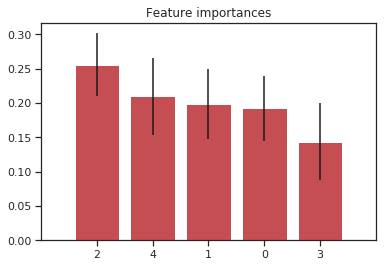

In [26]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [27]:
actual_values = y_test.values.argmax(axis=1)
predictions = clf.predict(X_test).argmax(axis=1)

accuracy_score = accuracy_score(actual_values, predictions)
accuracy_score

0.9662731871838112

In [28]:
balanced_accuracy_score = balanced_accuracy_score(actual_values, predictions)
balanced_accuracy_score

0.9649615471263557

In [29]:
precision = pd.DataFrame(precision_score(actual_values, predictions,average=None))
recall = pd.DataFrame(recall_score(actual_values, predictions,average=None))
f1_score = pd.DataFrame(f1_score(actual_values, predictions, average=None))

precision_recall = pd.concat([precision, recall, f1_score], axis=1)
precision_recall.columns = ['precision', 'recall', 'f1_score']
precision_recall.index = ['Cena', 'Ducha', 'Lavadora', 'Aspiradora', 'Afeitadora', 'Secador_pelo', 
                          'Aire_acondicionado', 'Telefono', 'Tecleo', 'Silencio', 'Secadora', 'Timbre', 
                          'Licuadora', 'Alarma', 'Grifo', 'Microondas']
precision_recall.index.name = 'momento_aux'
precision_recall

,precision,recall,f1_score
momento_aux,,,
Cena,0.666667,1.000000,0.800000
Ducha,1.000000,0.976190,0.987952
Lavadora,1.000000,0.969697,0.984615
Aspiradora,1.000000,0.972222,0.985915
Afeitadora,1.000000,0.956522,0.977778
Secador_pelo,0.975000,1.000000,0.987342
Aire_acondicionado,1.000000,0.951220,0.975000
Telefono,1.000000,1.000000,1.000000
Tecleo,1.000000,0.842105,0.914286


Confusion matrix, without normalization
[[38  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 41  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0 32  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0 35  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 22  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0 39  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 55  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 36  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0 27  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0 39  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 39  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0 32  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 40]]


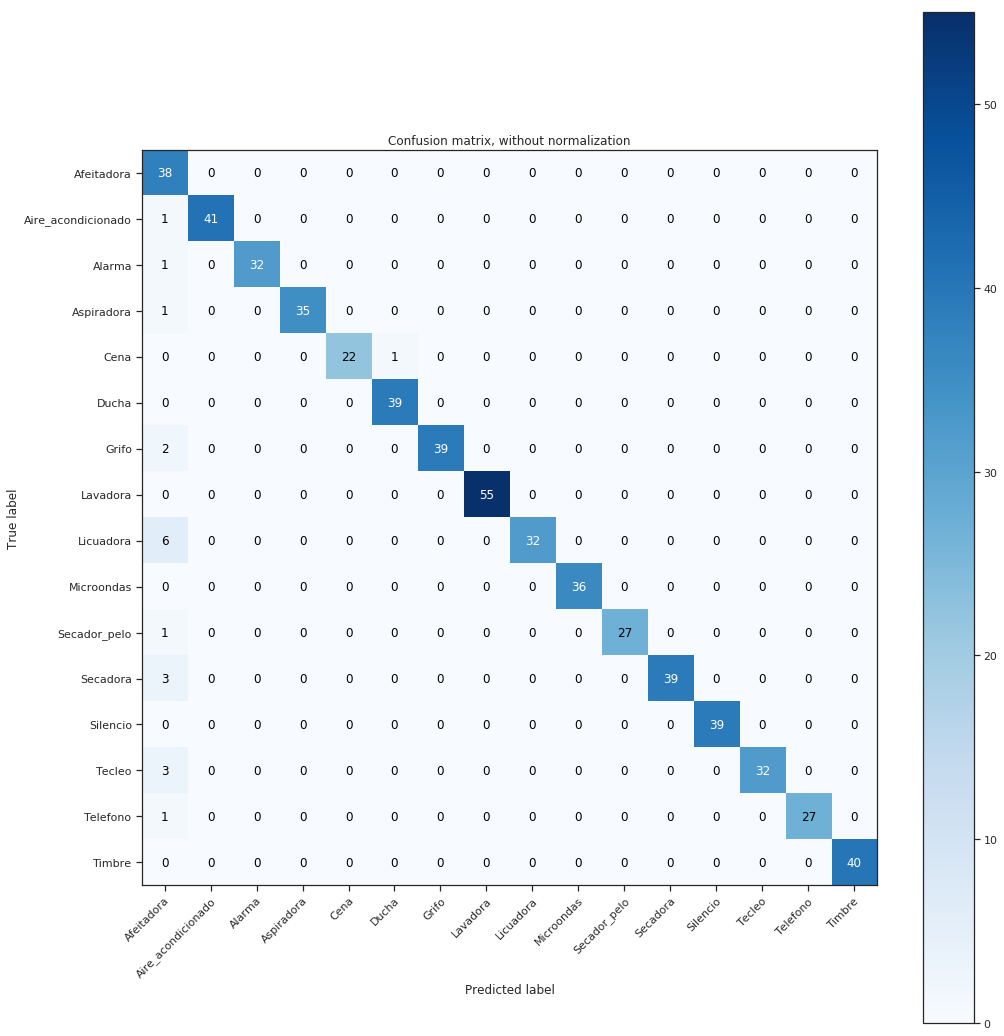

In [30]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(15,15))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(actual_values, predictions, y.columns)

In [31]:
y = label_binarize(y, classes=['Cena', 'Ducha', 'Lavadora', 'Aspiradora', 'Afeitadora', 'Secador_pelo', 
                               'Aire_acondicionado', 'Telefono', 'Tecleo', 'Silencio', 'Secadora', 'Timbre', 
                               'Licuadora', 'Alarma', 'Grifo', 'Microondas'])
n_classes = y.shape[1]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [33]:
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=40))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

In [34]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [35]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [36]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [37]:
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

In [38]:
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

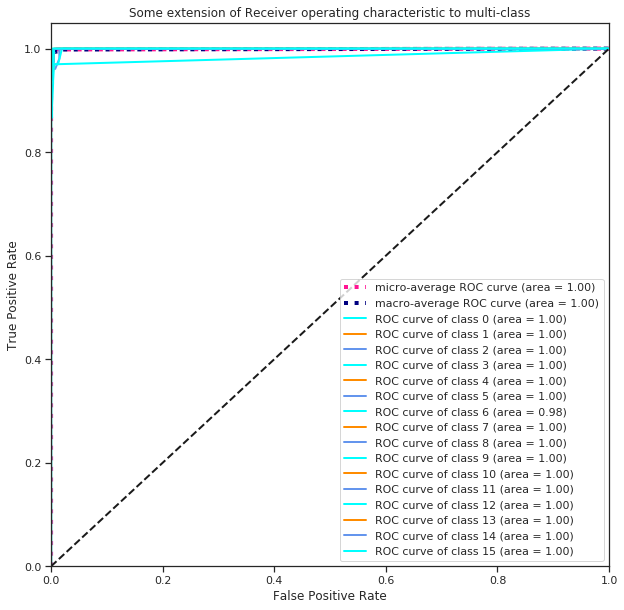

In [39]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# PCA - 6

In [40]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import librosa.display
import librosa

from glob import glob

import ffmpeg

import os

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier

from scipy import interp

from itertools import cycle

import seaborn as sns

In [41]:
data1 = pd.read_csv('./Sonidos de casa/data_momento_aux.csv')
data2 = pd.read_csv('./Sonidos de casa/data_momento_aux_shaver.csv')
data3 = pd.read_csv('./Sonidos de casa/data_momento_aux_hairdryer.csv')
data4 = pd.read_csv('./Sonidos de casa/data_momento_aux_airconditioner.csv')
data5 = pd.read_csv('./Sonidos de casa/data_momento_aux_cellphone.csv')
data6 = pd.read_csv('./Sonidos de casa/data_momento_aux_comp_type.csv')
data7 = pd.read_csv('./Sonidos de casa/data_momento_aux_shower.csv')
data8 = pd.read_csv('./Sonidos de casa/data_momento_aux_vacuum_silence_dryer.csv')
data9 = pd.read_csv('./Sonidos de casa/data_momento_aux_blender_doorbell.csv')
data10 = pd.read_csv('./Sonidos de casa/data_momento_aux_alarm_faucet_microwave.csv')

data = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10])

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
features = ['mfcc', 'scem', 'scom', 'srom', 'sbwm', 'tempo', 'rmse']

x = data.loc[:, features].values
y = data.loc[:,['momento_aux']].values

x = StandardScaler().fit_transform(x)

In [44]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1',
                                      'principal component 2',
                                      'principal component 3',
                                      'principal component 4',
                                      'principal component 5',
                                      'principal component 6'])

In [46]:
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6
0,-2.908475,-1.183207,0.004665,-0.692620,-0.159871,-0.175574
1,0.597411,-1.375698,0.282320,-0.717515,0.182912,-0.073189
2,0.580970,3.266432,-0.161297,0.105091,0.430711,0.112332
3,-0.744115,-1.413075,0.030856,-0.458438,-0.523544,-0.448938
4,-2.020234,-1.225178,-0.258659,0.596813,-0.563518,0.295276


In [47]:
data[['momento_aux']].head()

,momento_aux
0,Lavadora
1,Aspiradora
2,Ducha
3,Lavadora
4,Lavadora


In [48]:
principalDf.reset_index(drop=True, inplace=True)

In [49]:
aux = data[['momento_aux']]
aux.reset_index(drop=True, inplace=True)

In [50]:
finalDf = pd.concat([principalDf, aux], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,momento_aux
0,-2.908475,-1.183207,0.004665,-0.692620,-0.159871,-0.175574,Lavadora
1,0.597411,-1.375698,0.282320,-0.717515,0.182912,-0.073189,Aspiradora
2,0.580970,3.266432,-0.161297,0.105091,0.430711,0.112332,Ducha
3,-0.744115,-1.413075,0.030856,-0.458438,-0.523544,-0.448938,Lavadora
4,-2.020234,-1.225178,-0.258659,0.596813,-0.563518,0.295276,Lavadora


In [51]:
pca.explained_variance_ratio_

array([0.48546933, 0.20640729, 0.13593341, 0.09685188, 0.04908501,
       0.02396866])

In [52]:
np.sum(pca.explained_variance_ratio_)*100

99.7715576494056

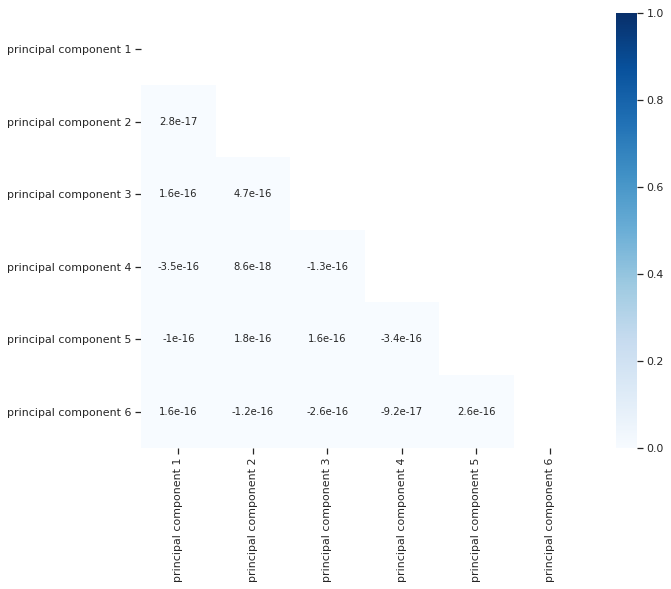

In [53]:
mask = np.zeros_like(finalDf.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(finalDf.corr(), mask=mask, annot=True, cmap="Blues")

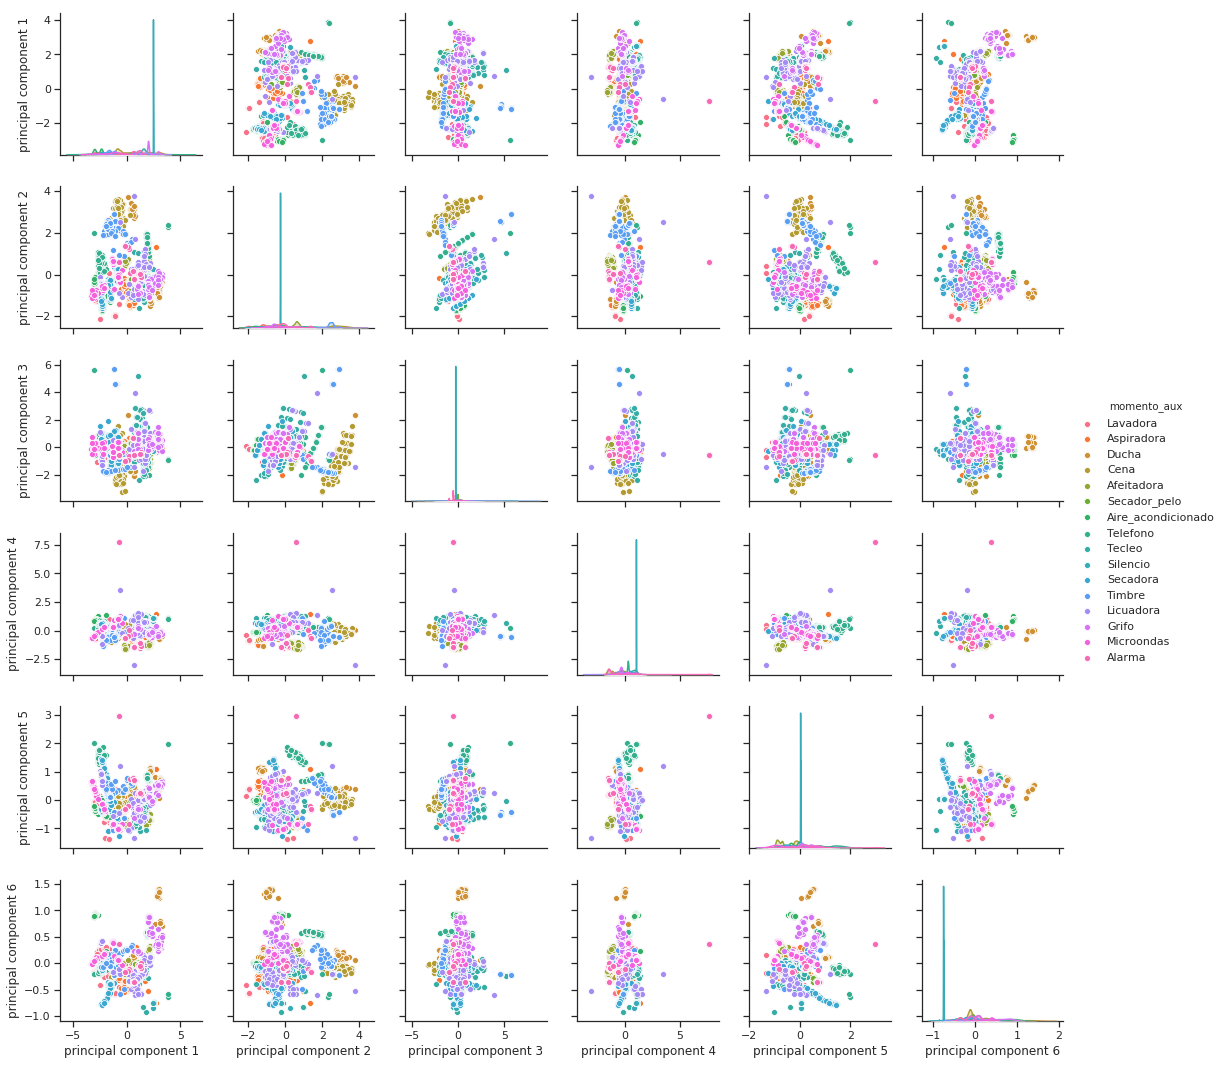

In [54]:
sns.set(style="ticks")

sns.pairplot(finalDf, hue="momento_aux")

In [55]:
y = pd.get_dummies(data=finalDf.momento_aux)
X = data.loc[:, finalDf.columns != 'momento_aux']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [56]:
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=60))
scores = cross_val_score(clf, X, y, cv=20)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.97986577 0.91216216 0.93918919 0.97297297 1.         0.93243243
 0.98648649 0.40540541 0.95945946 0.9527027  0.98648649 0.9527027
 0.97297297 0.92567568 0.85810811 0.91891892 0.97297297 0.99324324
 0.97297297 0.94594595]
Accuracy: 0.93 (+/- 0.25)


In [57]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9561551433389545

In [58]:
predictions = clf.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: Afeitadora            0.00
Aire_acondicionado    0.00
Alarma                0.00
Aspiradora            0.01
Cena                  0.00
Ducha                 0.00
Grifo                 0.00
Lavadora              0.01
Licuadora             0.01
Microondas            0.00
Secador_pelo          0.00
Secadora              0.00
Silencio              0.00
Tecleo                0.00
Telefono              0.00
Timbre                0.00
dtype: float64 degrees.


In [59]:
cls = RandomForestClassifier(n_estimators=40, random_state=0)
cls.fit(X_train, y_train)
importances = cls.feature_importances_

In [60]:
std = np.std([tree.feature_importances_ for tree in cls.estimators_], axis=0)

In [61]:
indices = np.argsort(importances)[::-1]

In [62]:
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

display(pd.DataFrame(cls.feature_importances_, 
                     index = X_train.columns, 
                     columns = ['importance']).sort_values('importance', ascending=False))

Feature ranking:
1. feature 2 (0.243133)
2. feature 4 (0.198702)
3. feature 1 (0.189597)
4. feature 0 (0.176309)
5. feature 3 (0.158041)
6. feature 5 (0.034217)


,importance
scom,0.243133
sbwm,0.198702
scem,0.189597
mfcc,0.176309
srom,0.158041
tempo,0.034217


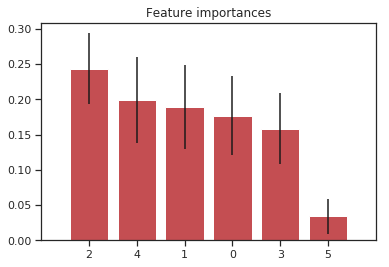

In [63]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [64]:
actual_values = y_test.values.argmax(axis=1)
predictions = clf.predict(X_test).argmax(axis=1)

accuracy_score = accuracy_score(actual_values, predictions)
accuracy_score

0.9561551433389545

In [65]:
balanced_accuracy_score = balanced_accuracy_score(actual_values, predictions)
balanced_accuracy_score

0.9548101325857612

In [66]:
precision = pd.DataFrame(precision_score(actual_values, predictions,average=None))
recall = pd.DataFrame(recall_score(actual_values, predictions,average=None))
f1_score = pd.DataFrame(f1_score(actual_values, predictions, average=None))

precision_recall = pd.concat([precision, recall, f1_score], axis=1)
precision_recall.columns = ['precision', 'recall', 'f1_score']
precision_recall.index = ['Cena', 'Ducha', 'Lavadora', 'Aspiradora', 'Afeitadora', 'Secador_pelo', 
                          'Aire_acondicionado', 'Telefono', 'Tecleo', 'Silencio', 'Secadora', 'Timbre', 
                          'Licuadora', 'Alarma', 'Grifo', 'Microondas']
precision_recall.index.name = 'momento_aux'
precision_recall

,precision,recall,f1_score
momento_aux,,,
Cena,0.652174,1.000000,0.789474
Ducha,1.000000,1.000000,1.000000
Lavadora,1.000000,1.000000,1.000000
Aspiradora,1.000000,0.827586,0.905660
Afeitadora,1.000000,0.956522,0.977778
Secador_pelo,1.000000,0.948718,0.973684
Aire_acondicionado,1.000000,1.000000,1.000000
Telefono,0.953488,0.931818,0.942529
Tecleo,1.000000,0.820513,0.901408


Confusion matrix, without normalization
[[45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 48  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0 37  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 38  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0 41  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  2  0 40  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0 37  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0 37  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 45  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 25  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 30]]


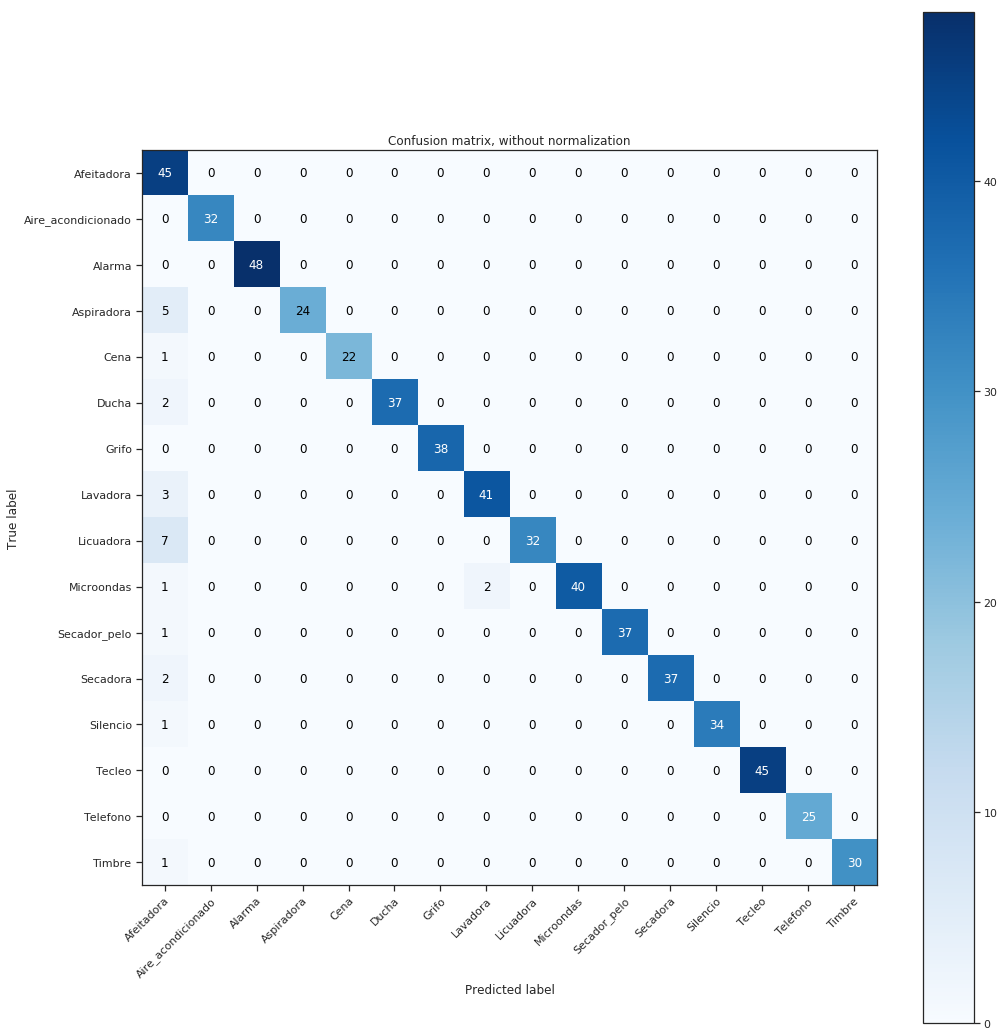

In [67]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(15,15))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(actual_values, predictions, y.columns)

In [68]:
y = label_binarize(y, classes=['Cena', 'Ducha', 'Lavadora', 'Aspiradora', 'Afeitadora', 'Secador_pelo', 
                               'Aire_acondicionado', 'Telefono', 'Tecleo', 'Silencio', 'Secadora', 'Timbre', 
                               'Licuadora', 'Alarma', 'Grifo', 'Microondas'])
n_classes = y.shape[1]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [70]:
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=40))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

In [71]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [72]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [73]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [74]:
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

In [75]:
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

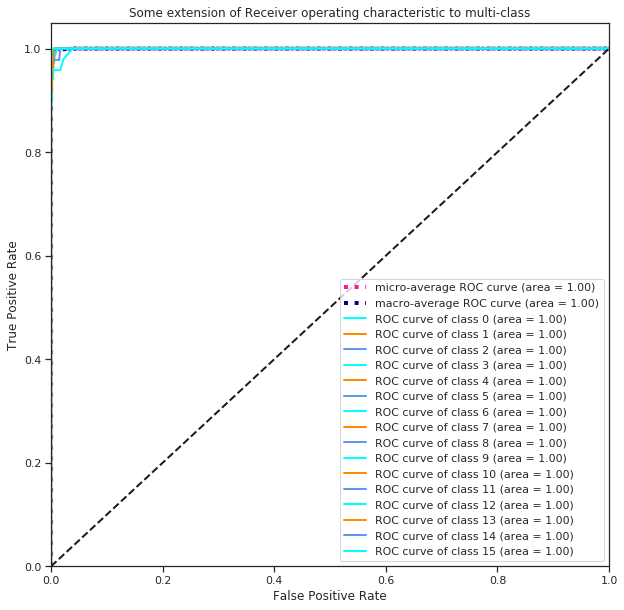

In [76]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# PCA - 4

In [77]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import librosa.display
import librosa

from glob import glob

import ffmpeg

import os

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier

from scipy import interp

from itertools import cycle

import seaborn as sns

In [78]:
data1 = pd.read_csv('./Sonidos de casa/data_momento_aux.csv')
data2 = pd.read_csv('./Sonidos de casa/data_momento_aux_shaver.csv')
data3 = pd.read_csv('./Sonidos de casa/data_momento_aux_hairdryer.csv')
data4 = pd.read_csv('./Sonidos de casa/data_momento_aux_airconditioner.csv')
data5 = pd.read_csv('./Sonidos de casa/data_momento_aux_cellphone.csv')
data6 = pd.read_csv('./Sonidos de casa/data_momento_aux_comp_type.csv')
data7 = pd.read_csv('./Sonidos de casa/data_momento_aux_shower.csv')
data8 = pd.read_csv('./Sonidos de casa/data_momento_aux_vacuum_silence_dryer.csv')
data9 = pd.read_csv('./Sonidos de casa/data_momento_aux_blender_doorbell.csv')
data10 = pd.read_csv('./Sonidos de casa/data_momento_aux_alarm_faucet_microwave.csv')

data = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10])

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1',
                                      'principal component 2',
                                      'principal component 3',
                                      'principal component 4'])

In [81]:
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4
0,-2.908475,-1.183207,0.004665,-0.692620
1,0.597411,-1.375698,0.282320,-0.717515
2,0.580970,3.266432,-0.161297,0.105091
3,-0.744115,-1.413075,0.030856,-0.458438
4,-2.020234,-1.225178,-0.258659,0.596813


In [82]:
data[['momento_aux']].head()

,momento_aux
0,Lavadora
1,Aspiradora
2,Ducha
3,Lavadora
4,Lavadora


In [83]:
principalDf.reset_index(drop=True, inplace=True)

In [84]:
aux = data[['momento_aux']]
aux.reset_index(drop=True, inplace=True)

In [85]:
finalDf = pd.concat([principalDf, aux], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,momento_aux
0,-2.908475,-1.183207,0.004665,-0.692620,Lavadora
1,0.597411,-1.375698,0.282320,-0.717515,Aspiradora
2,0.580970,3.266432,-0.161297,0.105091,Ducha
3,-0.744115,-1.413075,0.030856,-0.458438,Lavadora
4,-2.020234,-1.225178,-0.258659,0.596813,Lavadora


In [86]:
pca.explained_variance_ratio_

array([0.48546933, 0.20640729, 0.13593341, 0.09685188])

In [87]:
np.sum(pca.explained_variance_ratio_)*100

92.46619055488192

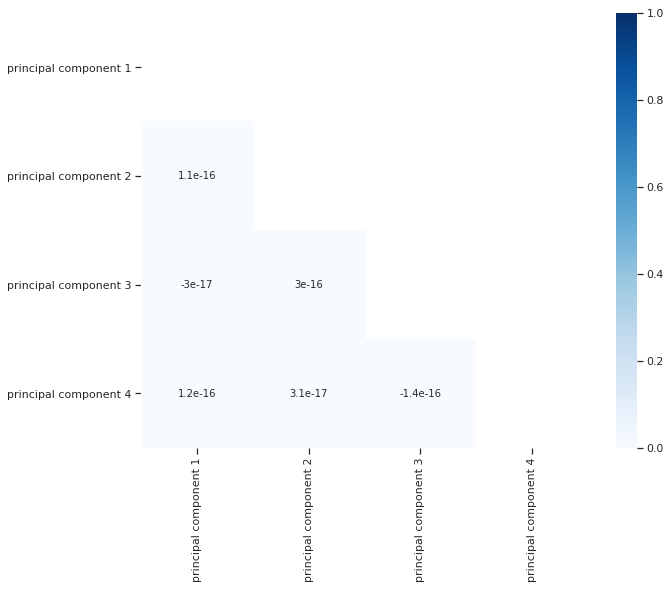

In [88]:
mask = np.zeros_like(finalDf.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(finalDf.corr(), mask=mask, annot=True, cmap="Blues")

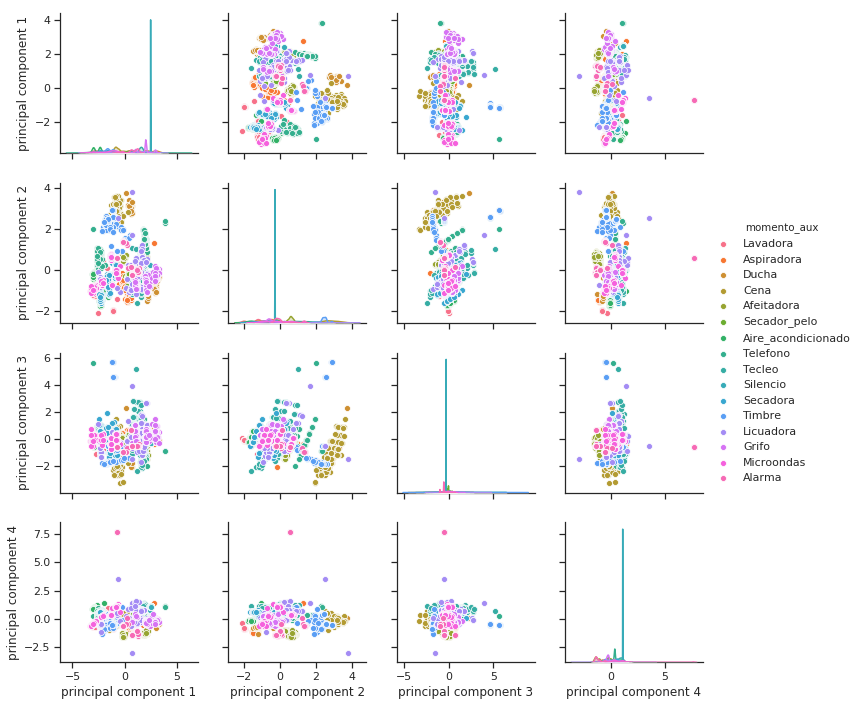

In [89]:
sns.set(style="ticks")

sns.pairplot(finalDf, hue="momento_aux")

In [90]:
y = pd.get_dummies(data=finalDf.momento_aux)
X = data.loc[:, finalDf.columns != 'momento_aux']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [91]:
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=60))
scores = cross_val_score(clf, X, y, cv=20)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.97315436 0.91216216 0.91216216 0.95945946 1.         0.91891892
 0.98648649 0.4527027  0.97297297 0.89864865 0.99324324 0.93243243
 0.96621622 0.92567568 0.84459459 0.91216216 0.97297297 1.
 0.9527027  0.95945946]
Accuracy: 0.92 (+/- 0.23)


In [92]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9713322091062394

In [93]:
predictions = clf.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: Afeitadora            0.00
Aire_acondicionado    0.00
Alarma                0.00
Aspiradora            0.01
Cena                  0.00
Ducha                 0.01
Grifo                 0.00
Lavadora              0.00
Licuadora             0.01
Microondas            0.01
Secador_pelo          0.00
Secadora              0.00
Silencio              0.00
Tecleo                0.00
Telefono              0.00
Timbre                0.00
dtype: float64 degrees.


In [94]:
cls = RandomForestClassifier(n_estimators=40, random_state=0)
cls.fit(X_train, y_train)
importances = cls.feature_importances_

In [95]:
std = np.std([tree.feature_importances_ for tree in cls.estimators_], axis=0)

In [96]:
indices = np.argsort(importances)[::-1]

In [97]:
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

display(pd.DataFrame(cls.feature_importances_, 
                     index = X_train.columns, 
                     columns = ['importance']).sort_values('importance', ascending=False))

Feature ranking:
1. feature 2 (0.297081)
2. feature 0 (0.264902)
3. feature 1 (0.223366)
4. feature 3 (0.214652)


,importance
scom,0.297081
mfcc,0.264902
scem,0.223366
srom,0.214652


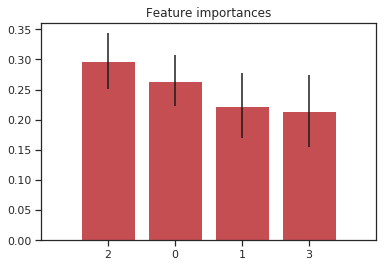

In [98]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [99]:
actual_values = y_test.values.argmax(axis=1)
predictions = clf.predict(X_test).argmax(axis=1)

accuracy_score = accuracy_score(actual_values, predictions)
accuracy_score

0.9713322091062394

In [100]:
balanced_accuracy_score = balanced_accuracy_score(actual_values, predictions)
balanced_accuracy_score

0.9715231086530429

In [101]:
precision = pd.DataFrame(precision_score(actual_values, predictions,average=None))
recall = pd.DataFrame(recall_score(actual_values, predictions,average=None))
f1_score = pd.DataFrame(f1_score(actual_values, predictions, average=None))

precision_recall = pd.concat([precision, recall, f1_score], axis=1)
precision_recall.columns = ['precision', 'recall', 'f1_score']
precision_recall.index = ['Cena', 'Ducha', 'Lavadora', 'Aspiradora', 'Afeitadora', 'Secador_pelo', 
                          'Aire_acondicionado', 'Telefono', 'Tecleo', 'Silencio', 'Secadora', 'Timbre', 
                          'Licuadora', 'Alarma', 'Grifo', 'Microondas']
precision_recall.index.name = 'momento_aux'
precision_recall

,precision,recall,f1_score
momento_aux,,,
Cena,0.795918,1.000000,0.886364
Ducha,1.000000,0.937500,0.967742
Lavadora,1.000000,0.973684,0.986667
Aspiradora,0.948718,0.948718,0.948718
Afeitadora,0.966667,1.000000,0.983051
Secador_pelo,1.000000,0.921053,0.958904
Aire_acondicionado,0.972973,1.000000,0.986301
Telefono,0.979592,1.000000,0.989691
Tecleo,1.000000,0.868421,0.929577


Confusion matrix, without normalization
[[39  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 30  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 1  0 37  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0 37  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0 35  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0  0  0  0  0  0  0]
 [ 2  0  0  2  0  0  0  0 33  1  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  1  0 34  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 39  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0 38  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 28  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0 41]]


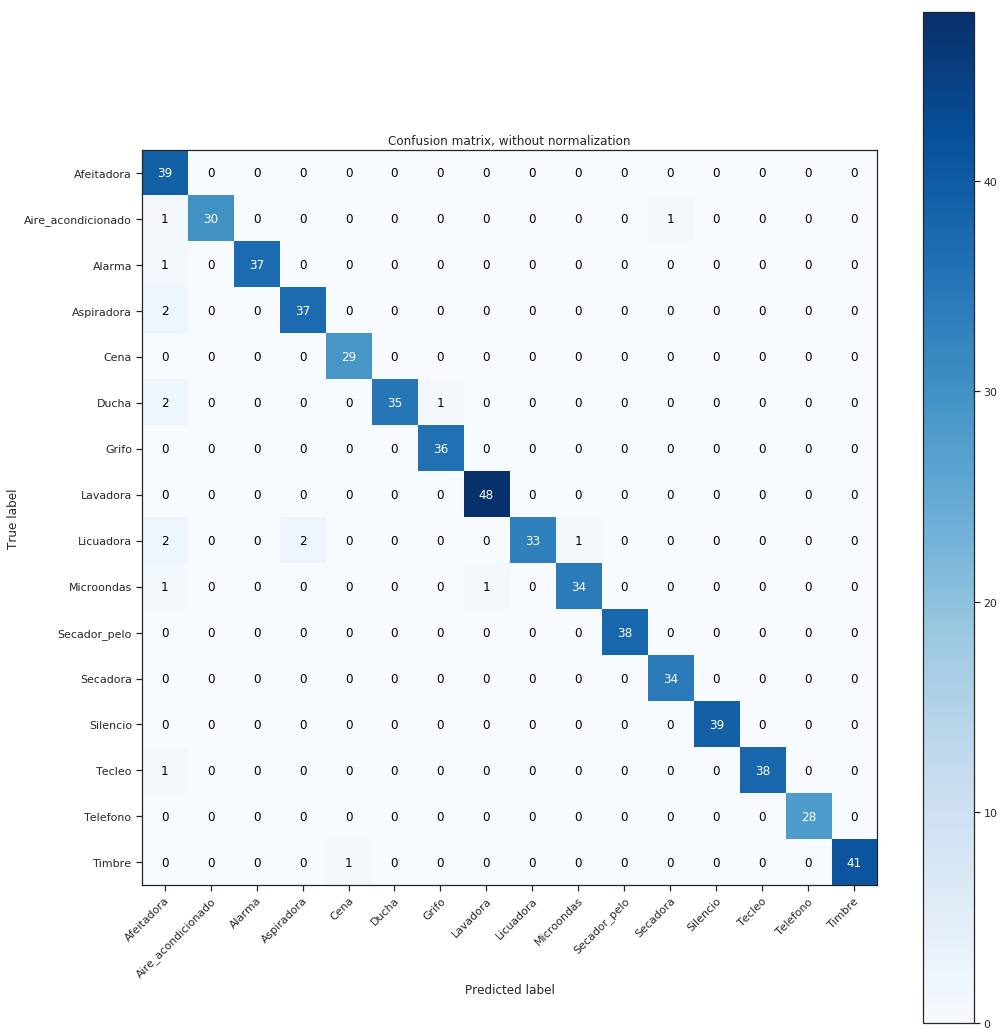

In [102]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(15,15))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(actual_values, predictions, y.columns)

In [103]:
y = label_binarize(y, classes=['Cena', 'Ducha', 'Lavadora', 'Aspiradora', 'Afeitadora', 'Secador_pelo', 
                               'Aire_acondicionado', 'Telefono', 'Tecleo', 'Silencio', 'Secadora', 'Timbre', 
                               'Licuadora', 'Alarma', 'Grifo', 'Microondas'])
n_classes = y.shape[1]

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [105]:
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=40))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

In [106]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [107]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [108]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [109]:
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

In [110]:
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

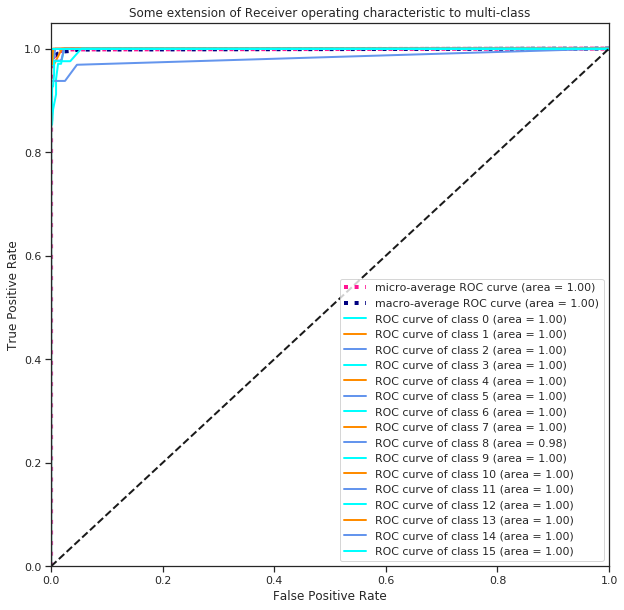

In [111]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()